In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
!pip install konlpy 
from konlpy.tag import Komoran
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 76.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 26.2 MB/s eta 0:00:00


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f239313ccd0>)

In [3]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [4]:
import kagglehub
lakshmi25npathi_imdb_dataset_of_50k_movie_reviews_path = kagglehub.dataset_download('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')


In [5]:
print('Data source import complete.')
#from torch.utils.data.dataset import random_split


Data source import complete.


In [6]:
imdb_df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")


In [7]:
import re 
re.sub("<[^>]*>", '', imdb_df.iloc[1,0])

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [8]:
test = imdb_df['review'].apply(lambda x : re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', x.lower()))

In [9]:
test[test.apply(lambda x : True if len(x)> 0 else False)]

45             [:)]
62             [;)]
71             [;)]
331            [:)]
622           [:-(]
            ...    
49638          [:)]
49764          [:)]
49872          [:)]
49920         [;-)]
49931    [:-), ;-)]
Name: review, Length: 622, dtype: object

In [10]:
imdb_df['review'] = imdb_df['review'].apply(lambda x : 
            re.sub( "<[^>]*>" , '', re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', x.lower())))

In [11]:
test_list = imdb_df['review'].tolist()
test_all = "".join(test_list)
test_split = test_all.split()

In [12]:
from collections import Counter
imdb_token = Counter(test_split)

In [13]:
data ={k:v for k, v in sorted(imdb_token.items(), key=lambda x : x[1], reverse=True)[:20]}

In [14]:
data

{'the': 637417,
 'a': 315431,
 'and': 313725,
 'of': 286631,
 'to': 264467,
 'is': 204840,
 'in': 179392,
 'i': 133307,
 'this': 131859,
 'that': 130126,
 'it': 129250,
 'was': 93242,
 'as': 87854,
 'with': 84490,
 'for': 84272,
 'but': 78003,
 'on': 62848,
 'movie': 61435,
 'are': 57000,
 'his': 56880}

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=800,
    height=400
).generate_from_frequencies(data)

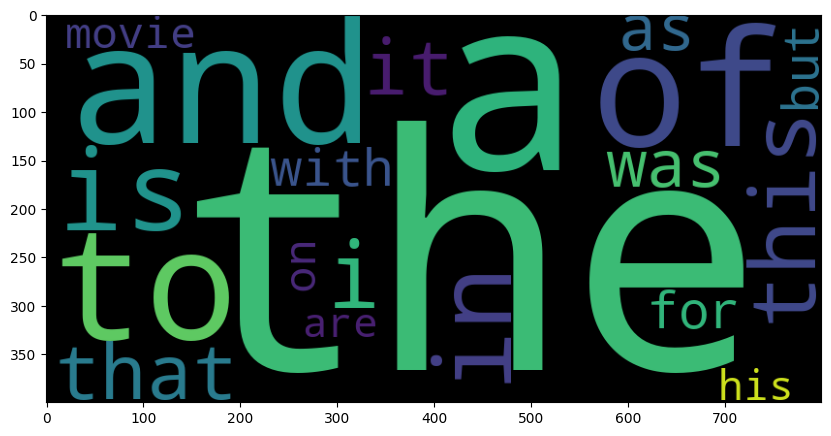

In [16]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
wordcloud = WordCloud(
    width=800,
    height=400
).generate_from_frequencies({x[0] : x[1] for x in [(k, v) for k , v in sorted(imdb_token.items(), key=lambda x : x[1], reverse=True) if k not in stopword][:50]})

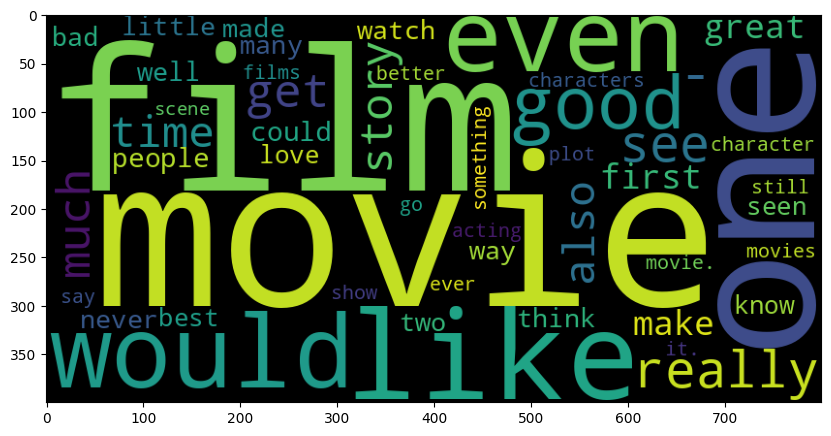

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show() 

In [20]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Komoran
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter


In [21]:
import kagglehub
lakshmi25npathi_imdb_dataset_of_50k_movie_reviews_path = kagglehub.dataset_download('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

print('Data source import complete.')
#from torch.utils.data.dataset import random_split

Data source import complete.


In [22]:
imdb_df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")


import re 
imdb_df['review'] = imdb_df['review'].apply(lambda x : 
            re.sub( "<[^>]*>" , '', re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', x.lower())))


In [24]:
test_split  = " ".join(imdb_df['review'].tolist()).split()

from collections import Counter
imdb_token = Counter(test_split)


In [25]:
import nltk 
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [26]:
vocab = list(imdb_token.keys())

In [28]:
vocab.insert(0, '<pad>')
vocab.insert(1, '<unk>')

In [30]:
# imdb_df['token'] = imdb_df['review'].apply(lambda x : [vocab.index(token) for token in x.split()])

KeyboardInterrupt: 

In [32]:
def transfer(x):
    tmp = np.zeros(200)
    for idx, x in enumerate(x.split()[:200]):
        tmp[idx] = vocab.index(x)
    return tmp


In [ ]:
imdb_df['token'] = imdb_df.iloc[:, 0].apply(transfer)